In [23]:
'''
init environment
'''

import webuiapi
api = webuiapi.WebUIApi(host='127.0.0.1', port=7860)
options = api.get_options()
print('options', options)


prompt = '''
beautiful lady face,
detail face, detail eye, detail noise, detail mouth,
(Facing forward, Facial close-up),
realistic style, (Pure white background),
(Left margin, right margin, top margin),
'''

negative_prompt = '''
low resolution, low quality, mosaic pictures, Problems in drawing, Bad painting,
watermark, Invisible watermark, username, Signature, jpeg artifacts,
abnormal body structure, abnormal posture, abnormal fingers,
Asymmetrical eyes, abnormal eyes, Low quality eyes, Cross eyes, Low eyes detail, Strange eyes,
Asymmetrical nose, abnormal nose, Low quality nose, Low nose detail, Strange nose,
Asymmetrical mouth, abnormal mouth, Low quality mouth, Low mouth detail, Strange mouth,
cartoon style, fantastical style,
Asymmetrical face, 2 face, Twisted head, Fragmented face, Obstructed character,
'''


model_names = [
    'protogenX53Photorealism_10.safetensors [93a10d6661]',
    'deliberate_v2.safetensors',
    'neverendingDreamNED_bakedVae-pruned.safetensors',
    # 'anything-v4.5-pruned.safetensors',
]

def change_model(index=0):
    name = model_names[index]
    api.util_set_model(name)


options {'samples_save': True, 'samples_format': 'png', 'samples_filename_pattern': '', 'save_images_add_number': True, 'grid_save': True, 'grid_format': 'png', 'grid_extended_filename': False, 'grid_only_if_multiple': True, 'grid_prevent_empty_spots': False, 'n_rows': -1.0, 'enable_pnginfo': True, 'save_txt': False, 'save_images_before_face_restoration': False, 'save_images_before_highres_fix': False, 'save_images_before_color_correction': False, 'save_mask': False, 'save_mask_composite': False, 'jpeg_quality': 80.0, 'webp_lossless': False, 'export_for_4chan': True, 'img_downscale_threshold': 4.0, 'target_side_length': 4000.0, 'img_max_size_mp': 200.0, 'use_original_name_batch': True, 'use_upscaler_name_as_suffix': False, 'save_selected_only': True, 'do_not_add_watermark': False, 'temp_dir': '', 'clean_temp_dir_at_start': False, 'outdir_samples': '', 'outdir_txt2img_samples': 'outputs/txt2img-images', 'outdir_img2img_samples': 'outputs/img2img-images', 'outdir_extras_samples': 'output

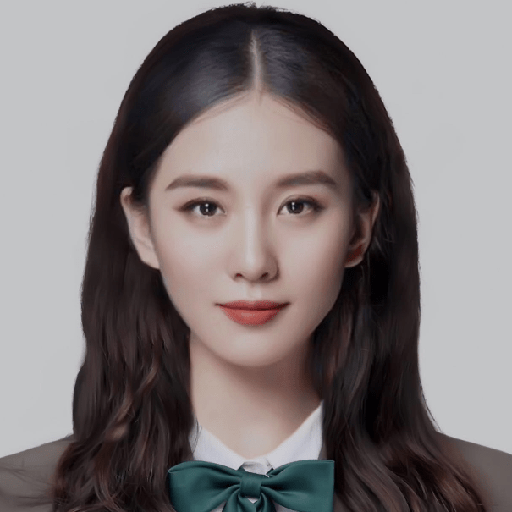

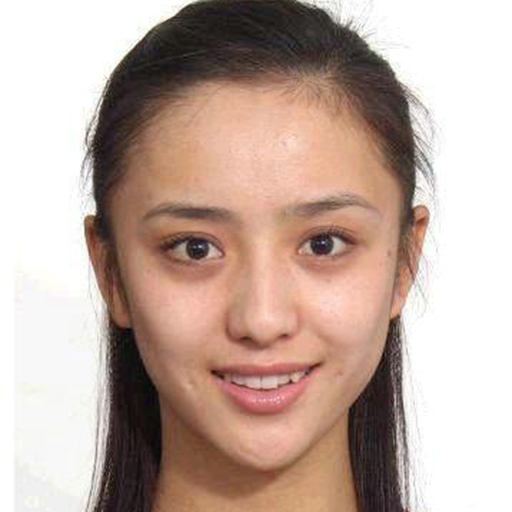

In [16]:
'''
select your photo
'''

from IPython import display
from PIL import Image

images_filename = [
    './data/source1.png',
    './data/source2.jpg',
]

for i in range(len(images_filename)):
    display.display(Image.open(images_filename[i]))


select index 0


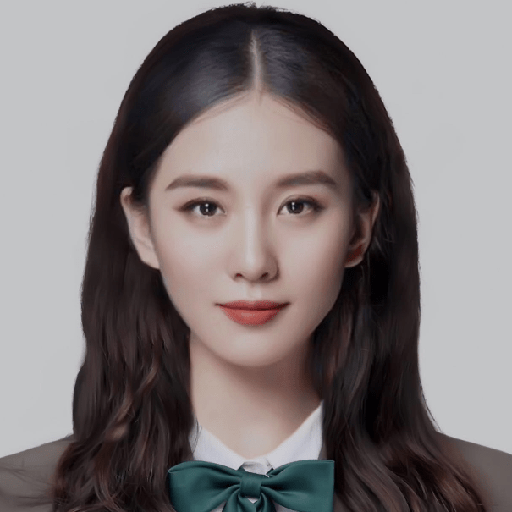

In [17]:
source_index = int(input('choose one'))
source_index = min(source_index, len(images_filename) - 1)
source_index = max(0, source_index)
print('select index', source_index)

source_image_filename = images_filename[source_index]
display.display(Image(source_image_filename))


In [21]:
# init exam

import time
import os
import random

# it is UID, UID is unique identify for each user
uid = str(time.time()) + '_' + str(random.randint(0, 0x7fffffff))

exam_name = uid
exam_folder = './output/' + exam_name + '/'

if not os.path.exists(exam_folder):
    os.mkdir(exam_folder)

print('task id', exam_name)



task id 1681036484.969869_1719957165


In [ ]:

from PIL import Image
face_image = Image.open(source_image_filename)

change_model(0)

picture_size = 512
results = []
for i in range(4):
    result1 = api.img2img(
        prompt=prompt,
        negative_prompt=negative_prompt,
        images=[face_image],
        denoising_strength=0.5,
        seed=-1,
        cfg_scale=7,
        sampler_name='DPM2 a Karras',
        # sampler_name='DPM++ SDE Karras',
        steps=25,
        batch_size=1,
        width=picture_size,
        height=picture_size,
        restore_faces=True,
        script_name=None,
        # hr_resize_x=1024,
        # hr_resize_y=1024,
        # styles=["anime"],

    )
    results.append(result1)


img_files = []
for i in range(len(results)):
    r = results[i]
    file = exam_folder + str(i) + '.png'
    r.image.save(file)
    img_files.append(file)


from utils.utilsImage import UtilsImage
UtilsImage.combine2one(img_files, exam_folder + 'combine.png',
                       2, 2, picture_size * 2, picture_size * 2,
                       deleteSource=False)
combine_img = Image.open(exam_folder + 'combine.png')
display.display(combine_img)


loading protogenX53Photorealism_10.safetensors [93a10d6661]
model changed to protogenX53Photorealism_10.safetensors [93a10d6661]


In [30]:
output_index = int(input('choose one'))
output_index = min(output_index, len(img_files) - 1)
output_index = max(0, output_index)
print('select index', output_index)

output_image_filename = img_files[output_index]
display.display(Image.open(output_image_filename))



select index 1
['./output/1681036484.969869_1719957165/0.png', './output/1681036484.969869_1719957165/1.png', './output/1681036484.969869_1719957165/2.png', './output/1681036484.969869_1719957165/3.png']


FileNotFoundError: [Errno 2] No such file or directory: './output/1681036484.969869_1719957165/1.png'